# **Fraud Detection**

# **Data Description**

Penipuan asuransi kendaraan melibatkan konspirasi untuk membuat klaim palsu yang melibatkan kerusakan kendaraan secara berlebihan atau cedera pengendara setelah kecelakaan. Beberapa contoh umum termasuk kecelakaan bertahap di mana penipu sengaja "mengatur" agar kecelakaan terjadi; penggunaan penumpang bayangan di mana orang-orang yang bahkan tidak berada di lokasi kecelakaan mengklaim telah menderita cedera parah, dan membuat klaim cedera pribadi palsu di mana cedera pribadi terlalu dibesar-besarkan. Untuk itu kita akan mencoba membuat model ML untuk mendeteksi kasus penipuan (fraud) saat memgklaim asuransi dan mana yang bukan kasus penipuan (no fraud)

# **Import Libraries**
---

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split 
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE 
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer 
import pickle

# **Loading Data**
---

In [2]:
pd.set_option('display.max_columns', None) # kode untuk melihat seluruh nama kolom 

In [4]:
df=pd.read_csv('fraud_oracle.csv')
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


# **Data Cleaning**

Berdasarkan describe data, terdapat anomali pada kolom Age, yaitu terdapat angka 0. Secara logika tidak ada umur 0. Oleh karena itu pada tahap ini umur 0 akan diganti dengan NaN, atau bisa dibilang 0 itu merupakan missing value. Nantinya missing value ini akan di handling pada tahap data preprocessing.

In [6]:
df['Age'].replace(to_replace={0: np.nan}, inplace=True)

# **EDA**
---

In [7]:
df_eda = df.copy()

In [8]:
print('Numeric Columns:',df.select_dtypes(include=np.number).columns.tolist())
print('Category columns:', df.select_dtypes(include=['object']).columns.tolist())

Numeric Columns: ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']
Category columns: ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


Data memiliki 9 kolom numerik dan 24 kolom kategori

In [9]:
df_eda['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [10]:
# Merubah keterangan value pada kolom FraudFound

df_eda['FraudFound_P'].replace({0: 'no fraud', 1: 'fraud'},inplace = True)

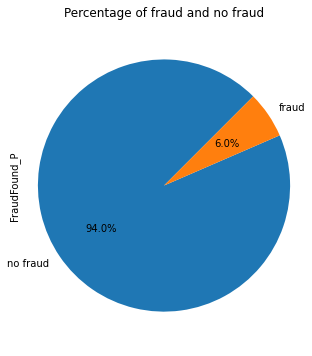

In [11]:
perc_tot_term_dep = df_eda['FraudFound_P'].value_counts()*100/len(df)

perc_tot_term_dep.plot(kind='pie',
            figsize=(5,6),
            autopct='%1.1f%%',
            startangle=45,
            shadow=False)

plt.title('Percentage of fraud and no fraud')
plt.axis('equal')

plt.show()

Pada keselurahan data, fraud yang terjadi terbilang hanya sedikit, 6% dari total keseluruhan data.

In [12]:
df_eda_fraud = df_eda [df_eda ['FraudFound_P'] == 'fraud']

<AxesSubplot:xlabel='Year', ylabel='count'>

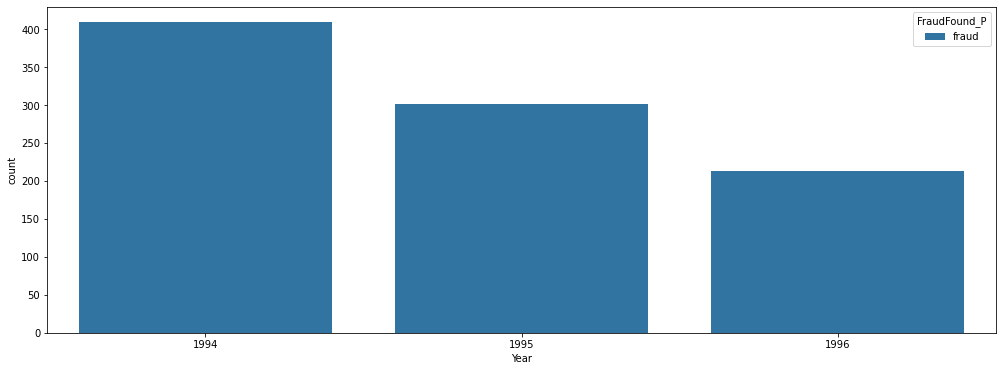

In [13]:
plt.figure(figsize = (17, 6))
sns.countplot('Year', hue = 'FraudFound_P', data = df_eda_fraud)

In [14]:
df_eda_fraud.groupby("Year")["FraudFound_P"].value_counts()

Year  FraudFound_P
1994  fraud           409
1995  fraud           301
1996  fraud           213
Name: FraudFound_P, dtype: int64

Dalam kurun waktu 3 tahun, yaitu tahun 1994-1996 terjadi penurunan kasus fraud.

<AxesSubplot:xlabel='AgentType', ylabel='count'>

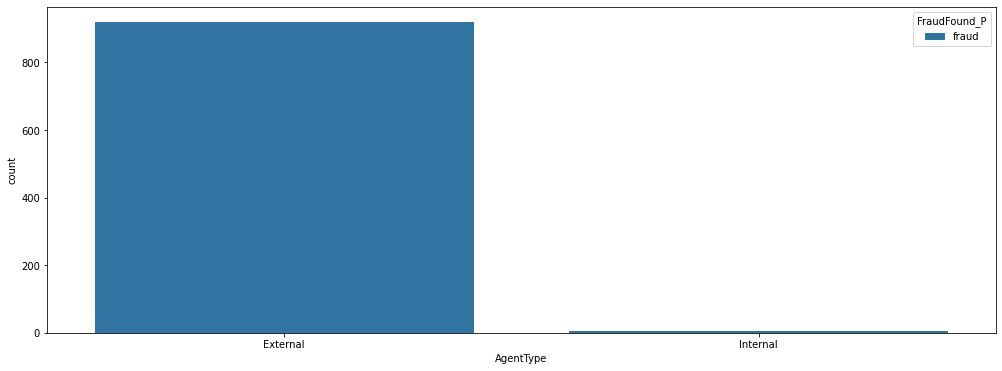

In [15]:
plt.figure(figsize = (17, 6))
sns.countplot('AgentType', hue = 'FraudFound_P', data = df_eda_fraud)

Penipuan banyak dilakukan oleh client yang menggunakan agen dari external perusahaan. Hal ini terjadi bisa terjadi dikarenakan agen eksternal tidak terikat dengan perusahaan sehingga menyebabkan mereka berani untuk membantu client dalam melakukan penipuan.

Text(0, 0.5, 'Range Price')

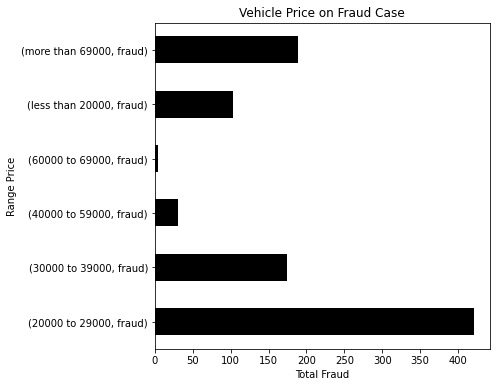

In [16]:
range_price= df_eda_fraud.groupby("VehiclePrice")["FraudFound_P"].value_counts()
range_price.plot(kind='barh', figsize=(6, 6), color='black')
plt.xlabel('Total Fraud')
plt.title('Vehicle Price on Fraud Case')
plt.ylabel('Range Price')

Kasus penipuan banyak terjadi di kendaraan yang memiliki kisaran harga $20000-$29000 dengan jumalah kasus > 400

# **Data Preprocessing**
---

## Get Data Inference

In [17]:
df_inf = df.sample(30, random_state=33)
df_train_test = df.drop(df_inf.index)

In [18]:
df_train_test.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True) 

## Split The Data

In [19]:
# Menjadikan kolom FraudFound sebagai label/target yang akan di prediksi
X = df_train_test.drop(['FraudFound_P'], axis=1)
y = df_train_test['FraudFound_P']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

print(X_train.shape)
print(X_test.shape)

(12312, 32)
(3078, 32)


## Outliers Handling

In [21]:
X_train_distr = pd.DataFrame({'columns':X_train.describe().columns, 'skew' : X_train.skew(axis=0)})
X_train_distr.reset_index(drop=True, inplace=True)
X_train_distr['distribution'] = np.where((X_train_distr['skew'] < 0.5) & (X_train_distr['skew'] > - 0.5) , 'Normal', 'Skew')
X_train_distr

,columns,skew,distribution
0,WeekOfMonth,0.119115,Normal
1,WeekOfMonthClaimed,0.154455,Normal
2,Age,0.722554,Skew
3,PolicyNumber,-0.002154,Normal
4,RepNumber,0.006434,Normal
5,Deductible,6.068661,Skew
6,DriverRating,0.009278,Normal
7,Year,0.247429,Normal


Hanya satu kolom yang memiliki dsitribusi skew, yaitu kolom Deductible

In [22]:
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower = df[variable].quantile(0.25) - distance * IQR
    upper = df[variable].quantile(0.75) + distance * IQR

    return upper, lower

In [23]:
j = 0
outliers={}
for i in X_train.describe().columns:
    if X_train_distr['distribution'].loc[(X_train_distr['columns']==i)].values[0]== 'Normal':
        upper_boundary, lower_boundary = find_normal_boundaries(X_train, i)
        print(f"Boundary Lower and Upper {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    else:
        upper_boundary, lower_boundary = find_skewed_boundaries(X_train, i, 1.5)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    print("="*30)
    j+=1

Boundary Lower and Upper WeekOfMonth:(-1.0806876153651017, 6.657360779757564)
Boundary Lower and Upper WeekOfMonthClaimed:(-1.0615623111363557, 6.448176995996654)
Batas lower dan upper untuk Age:(4.0, 76.0)
Boundary Lower and Upper PolicyNumber:(-5580.862967936164, 20988.339088793866)
Boundary Lower and Upper RepNumber:(-5.301551168569237, 22.279783787152734)
Batas lower dan upper untuk Deductible:(400.0, 400.0)
Boundary Lower and Upper DriverRating:(-0.8749524285987413, 5.851885502023043)
Boundary Lower and Upper Year:(1992.4646128479792, 1997.265406645198)


Untuk menghandling outlier akan dibuat kreteria sebagai berikut:

- Apabila outlier antara 0 - 5% akan dihandling dengan trimming
- Apabila outlier antara 5% - 15% akan dihandling dengan capping/windsorizer


In [24]:
for i, (k, v) in enumerate(outliers.items()):
    X_train_distr_handling= X_train.loc[~outliers[k]]
    X_train_distr.loc[i,'trimmed_row'] = X_train.shape[0] - X_train_distr_handling.shape[0]
    X_train_distr.loc[i,'percentage'] = np.round(100-(X_train_distr_handling.shape[0]/X_train.shape[0]*100), 2)
    X_train_distr.loc[i,'action'] = np.where(X_train_distr.loc[i,'percentage']==0, 'No Action', 
                                        np.where(X_train_distr.loc[i,'percentage']>15, 'Capping/Windsorizer', 'Trimming'))

X_train_distr
                                        

,columns,skew,distribution,trimmed_row,percentage,action
0,WeekOfMonth,0.119115,Normal,0.0,0.00,No Action
1,WeekOfMonthClaimed,0.154455,Normal,0.0,0.00,No Action
2,Age,0.722554,Skew,93.0,0.76,Trimming
3,PolicyNumber,-0.002154,Normal,0.0,0.00,No Action
4,RepNumber,0.006434,Normal,0.0,0.00,No Action
5,Deductible,6.068661,Skew,466.0,3.78,Trimming
6,DriverRating,0.009278,Normal,0.0,0.00,No Action
7,Year,0.247429,Normal,0.0,0.00,No Action


In [25]:
outliers_tot = outliers['outliers2']
for i, (k, v) in enumerate(outliers.items()):
    if i in [2,5]:
        outliers_tot += outliers[k]

In [26]:
X_train_trimmed = X_train.loc[~outliers_tot]
y_train_trimmed = y_train.loc[~outliers_tot]

print(f"Jumlah baris pada X_train SEBELUM di Trimming: {X_train.shape[0]}")
print(f"Jumlah baris pada X_train SETELAH di Trimming: {X_train_trimmed.shape[0]}")
print(f"% Outlier dari Keseluruhan Data: {100-(X_train_trimmed.shape[0]/X_train.shape[0]*100):.2f}%")

Jumlah baris pada X_train SEBELUM di Trimming: 12312
Jumlah baris pada X_train SETELAH di Trimming: 11756
% Outlier dari Keseluruhan Data: 4.52%


In [27]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Age - Before Trimming


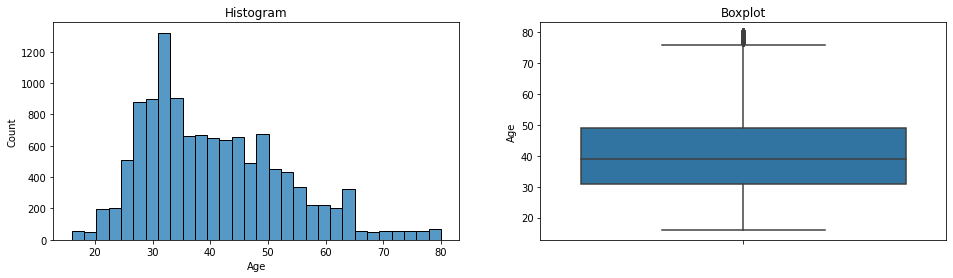


Age - After Trimming


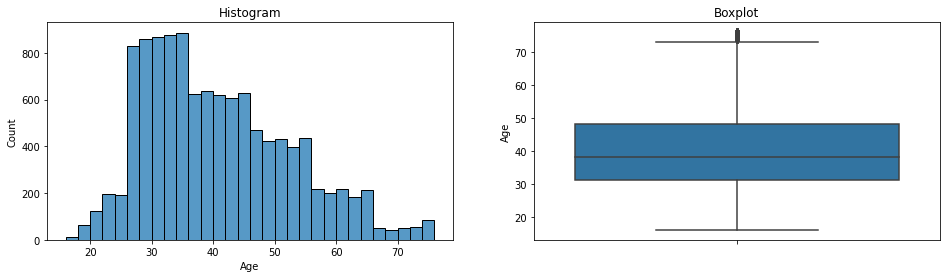

\Deductible - Before Trimming


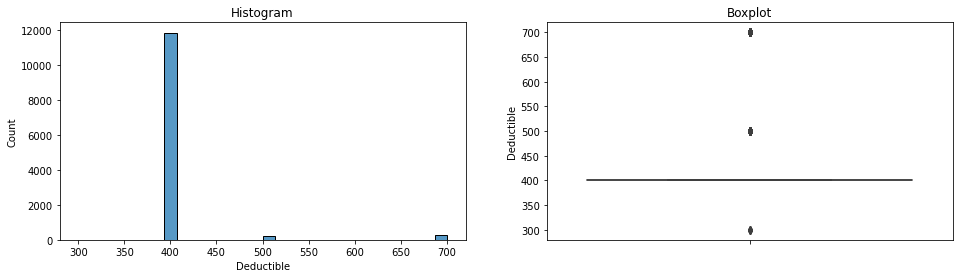


Deductible - After Trimming


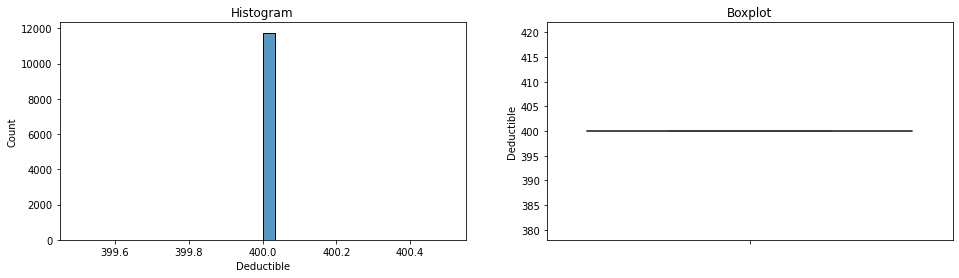

In [28]:
print('Age - Before Trimming')
diagnostic_plots(X_train, 'Age')
print('\nAge - After Trimming')
diagnostic_plots(X_train_trimmed, 'Age')

print('\Deductible - Before Trimming')
diagnostic_plots(X_train, 'Deductible')
print('\nDeductible - After Trimming')
diagnostic_plots(X_train_trimmed, 'Deductible')

## Missing Value Handling

In [29]:
X_train_trimmed.isna().sum()

Month                     0
WeekOfMonth               0
DayOfWeek                 0
Make                      0
AccidentArea              0
DayOfWeekClaimed          0
MonthClaimed              0
WeekOfMonthClaimed        0
Sex                       0
MaritalStatus             0
Age                     264
Fault                     0
PolicyType                0
VehicleCategory           0
VehiclePrice              0
PolicyNumber              0
RepNumber                 0
Deductible                0
DriverRating              0
Days_Policy_Accident      0
Days_Policy_Claim         0
PastNumberOfClaims        0
AgeOfVehicle              0
AgeOfPolicyHolder         0
PoliceReportFiled         0
WitnessPresent            0
AgentType                 0
NumberOfSuppliments       0
AddressChange_Claim       0
NumberOfCars              0
Year                      0
BasePolicy                0
dtype: int64

In [30]:
X_train_trimmed['Age'].skew()

0.6359516211137439

In [31]:
X_test.isna().sum()

Month                    0
WeekOfMonth              0
DayOfWeek                0
Make                     0
AccidentArea             0
DayOfWeekClaimed         0
MonthClaimed             0
WeekOfMonthClaimed       0
Sex                      0
MaritalStatus            0
Age                     54
Fault                    0
PolicyType               0
VehicleCategory          0
VehiclePrice             0
PolicyNumber             0
RepNumber                0
Deductible               0
DriverRating             0
Days_Policy_Accident     0
Days_Policy_Claim        0
PastNumberOfClaims       0
AgeOfVehicle             0
AgeOfPolicyHolder        0
PoliceReportFiled        0
WitnessPresent           0
AgentType                0
NumberOfSuppliments      0
AddressChange_Claim      0
NumberOfCars             0
Year                     0
BasePolicy               0
dtype: int64

In [32]:
X_train_trimmed['Age'].fillna(X_train_trimmed['Age'].median(), inplace=True)
X_test['Age'].fillna(X_train_trimmed['Age'].median(), inplace=True)

Missing value pada kolom age diisi dengan nilai median karena distribusi pada kolom tersebut berbentuk skew.

## Feature Selection

In [33]:
df_eda.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,no fraud,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,no fraud,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,no fraud,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,no fraud,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27.0,Third Party,Sport - Collision,Sport,more than 69000,no fraud,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [34]:
df.corr()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.011905,-0.011861,-0.007797,0.005283,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001025,-0.005761,0.011665,0.008908,0.005457,-0.000048,0.012175
Age,-0.011905,0.001025,1.000000,-0.022494,0.015721,-0.005318,0.064278,0.000673,0.016682
FraudFound_P,-0.011861,-0.005761,-0.022494,1.000000,-0.020345,-0.007551,0.017348,0.007266,-0.024760
PolicyNumber,-0.007797,0.011665,0.015721,-0.020345,1.000000,0.008990,0.002133,-0.012312,0.936513
RepNumber,0.005283,0.008908,-0.005318,-0.007551,0.008990,1.000000,0.000509,0.011031,0.009338
Deductible,-0.003993,0.005457,0.064278,0.017348,0.002133,0.000509,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.000673,0.007266,-0.012312,0.011031,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.016682,-0.024760,0.936513,0.009338,-0.001170,-0.013890,1.000000


In [35]:
X_train_trimmed.drop(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed','MonthClaimed', 'WeekOfMonthClaimed', 'PolicyNumber','RepNumber' ,'Year'], axis=1, inplace=True)
X_test.drop(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make','AccidentArea',  'DayOfWeekClaimed','MonthClaimed', 'WeekOfMonthClaimed', 'PolicyNumber','RepNumber','Year'] , axis=1, inplace=True)

Kolom yang dihapus dilihat berdasarkan besaran korelasi terhadap kolom target. namun untuk beberapa kolom kategori dilakukan penghapusan karena berdasarkan informasi dari sumber data set menyebutkan beberapa kolom kategori tersebut tidak memiliki penjelasan yang cukup jelas. namaun dari beberapa kolom kategori tersebut seperti 'Make', 'Month', dan 'year' kita berasumsi bahwa tidak ada hubungannya kasus penipuan terjadi terhadap bulan, merek kendaraan, dan tahun. Karena kasus penipuan bisa terjadi dari berbagai faktor salahsatunya karena ada celah untuk melakukan penipuan pada perusahaan.

In [36]:
X_train_trimmed

,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
6888,Female,Married,26.0,Third Party,Sedan - Liability,Sport,20000 to 29000,400,4,more than 30,more than 30,none,6 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,Liability
11014,Male,Married,64.0,Policy Holder,Utility - Collision,Utility,more than 69000,400,4,more than 30,more than 30,2 to 4,more than 7,51 to 65,No,No,External,more than 5,no change,1 vehicle,Collision
2131,Male,Single,54.0,Third Party,Sport - Collision,Sport,more than 69000,400,3,more than 30,more than 30,none,7 years,41 to 50,No,No,External,3 to 5,no change,1 vehicle,Collision
2586,Female,Married,35.0,Policy Holder,Sedan - Collision,Sedan,less than 20000,400,1,more than 30,more than 30,2 to 4,7 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,Collision
4230,Male,Married,44.0,Policy Holder,Sedan - Liability,Sport,20000 to 29000,400,1,more than 30,more than 30,1,7 years,36 to 40,No,No,External,none,no change,1 vehicle,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11465,Female,Married,38.0,Third Party,Sedan - Collision,Sedan,less than 20000,400,4,more than 30,more than 30,2 to 4,7 years,36 to 40,No,No,External,3 to 5,no change,1 vehicle,Collision
578,Male,Married,44.0,Third Party,Sedan - All Perils,Sedan,less than 20000,400,4,more than 30,more than 30,none,7 years,36 to 40,No,No,External,none,no change,1 vehicle,All Perils
5848,Female,Single,22.0,Policy Holder,Sedan - All Perils,Sedan,20000 to 29000,400,3,more than 30,more than 30,1,5 years,26 to 30,No,No,External,more than 5,4 to 8 years,2 vehicles,All Perils
2439,Male,Married,46.0,Policy Holder,Sedan - All Perils,Sedan,20000 to 29000,400,4,more than 30,more than 30,none,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,All Perils


## Splitting Columns (Numerical Columns and Categorical Columns)

In [37]:
# Get Numerical and Categorical Columns

num_columns = X_train_trimmed.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_trimmed.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['Age', 'Deductible', 'DriverRating']
Categorical Columns :  ['Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


In [38]:
# Split on X_train

X_train_trimmed_num = X_train_trimmed[num_columns]
X_train_trimmed_cat = X_train_trimmed[cat_columns]

# Split on X_test

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [39]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_trimmed_num_scaled = scaler.fit_transform(X_train_trimmed_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [40]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_train_trimmed_cat_encoded = encoder.fit_transform(X_train_trimmed_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

## Concatenate between Numerical Columns and Categorical Columns

In [41]:
# Untuk model yang memerlukan scaler
X_train_final = np.concatenate([X_train_trimmed_num_scaled, X_train_trimmed_cat_encoded.toarray()], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded.toarray()], axis=1)


# **Model Definition, Training, Evaluation**

## Logistic Regression

In [42]:
# No Tuning

logreg = LogisticRegression(random_state=33) #  Model definition
logreg.fit(X_train_final, y_train_trimmed) # Model Training

# Model Evaluation
y_pred_train_logreg = logreg.predict(X_train_final)
y_pred_test_logreg = logreg.predict(X_test_final)

print('---------------------TRAIN---------------------')
print(classification_report(y_train_trimmed, y_pred_train_logreg))
print(confusion_matrix(y_train_trimmed, y_pred_train_logreg))
print('---------------------TEST---------------------')
print(classification_report(y_test, y_pred_test_logreg))
print(confusion_matrix(y_test, y_pred_test_logreg))

---------------------TRAIN---------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11073
           1       1.00      0.00      0.01       683

    accuracy                           0.94     11756
   macro avg       0.97      0.50      0.49     11756
weighted avg       0.95      0.94      0.91     11756

[[11073     0]
 [  680     3]]
---------------------TEST---------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2883
           1       0.00      0.00      0.00       195

    accuracy                           0.94      3078
   macro avg       0.47      0.50      0.48      3078
weighted avg       0.88      0.94      0.91      3078

[[2883    0]
 [ 195    0]]


In [43]:
print(confusion_matrix(y_test, y_pred_test_logreg))

[[2883    0]
 [ 195    0]]


In [44]:
# Tuning

log_reg_params={'penalty':['l1','l2'], 
                'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver': ['liblinear', 'newton-cg', 'lbfgs'],
                'class_weight':["balanced"]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=5)
grid_log_reg.fit(X_train_final, y_train_trimmed)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']})

In [45]:
grid_log_reg_best= grid_log_reg.best_estimator_
grid_log_reg_best

LogisticRegression(C=0.001, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [46]:
y_train_pred_grid_log_reg = grid_log_reg_best.predict(X_train_final)
y_test_pred_grid_log_reg = grid_log_reg_best.predict(X_test_final)

print('---------------------TRAIN---------------------')
print(classification_report(y_train_trimmed, y_train_pred_grid_log_reg))
print(confusion_matrix(y_train_trimmed, y_train_pred_grid_log_reg))
print('---------------------TEST---------------------')
print(classification_report(y_test, y_test_pred_grid_log_reg))
print(confusion_matrix(y_test, y_test_pred_grid_log_reg))

---------------------TRAIN---------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11073
           1       0.00      0.00      0.00       683

    accuracy                           0.94     11756
   macro avg       0.47      0.50      0.49     11756
weighted avg       0.89      0.94      0.91     11756

[[11073     0]
 [  683     0]]
---------------------TEST---------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2883
           1       0.00      0.00      0.00       195

    accuracy                           0.94      3078
   macro avg       0.47      0.50      0.48      3078
weighted avg       0.88      0.94      0.91      3078

[[2883    0]
 [ 195    0]]


## Decision Tree Classifier

In [47]:
# No Tuning

tree_clf = DecisionTreeClassifier(random_state=33)
tree_clf.fit(X_train_final, y_train_trimmed)



DecisionTreeClassifier(random_state=33)

In [48]:
y_pred_train_tree_clf = tree_clf.predict(X_train_final)
y_pred_test_tree_clf = tree_clf.predict(X_test_final)

print('---------------------TRAIN---------------------')
print(classification_report(y_train_trimmed, y_pred_train_tree_clf))
print(confusion_matrix(y_train_trimmed, y_pred_train_tree_clf))
print('---------------------TEST---------------------')
print(classification_report(y_test, y_pred_test_tree_clf))
print(confusion_matrix(y_test, y_pred_test_tree_clf))

---------------------TRAIN---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11073
           1       1.00      0.92      0.96       683

    accuracy                           1.00     11756
   macro avg       1.00      0.96      0.98     11756
weighted avg       1.00      1.00      1.00     11756

[[11073     0]
 [   53   630]]
---------------------TEST---------------------
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2883
           1       0.19      0.21      0.20       195

    accuracy                           0.89      3078
   macro avg       0.57      0.57      0.57      3078
weighted avg       0.90      0.89      0.90      3078

[[2713  170]
 [ 155   40]]


In [49]:
# Tuning

params_tree_clf = {'criterion':['gini','entropy'],
              'max_depth':np.arange(2,10),
              'min_samples_split':np.arange(2,10),
              'min_samples_leaf':np.arange(2,10)
              }

tree_clf_grid = GridSearchCV(DecisionTreeClassifier(), params_tree_clf, cv=5)
tree_clf_grid.fit(X_train_final, y_train_trimmed)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [50]:
tree_clf_grid_best= tree_clf_grid.best_estimator_
tree_clf_grid_best

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [51]:
y_pred_train_tree_clf_grid = tree_clf_grid.predict(X_train_final)
y_pred_test_tree_clf_grid = tree_clf_grid.predict(X_test_final)

print('---------------------TRAIN---------------------')
print(classification_report(y_train_trimmed, y_pred_train_tree_clf_grid))
print(confusion_matrix(y_train_trimmed, y_pred_train_tree_clf_grid))
print('---------------------TEST---------------------')
print(classification_report(y_test, y_pred_test_tree_clf_grid))
print(confusion_matrix(y_test, y_pred_test_tree_clf_grid))

---------------------TRAIN---------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11073
           1       0.00      0.00      0.00       683

    accuracy                           0.94     11756
   macro avg       0.47      0.50      0.49     11756
weighted avg       0.89      0.94      0.91     11756

[[11073     0]
 [  683     0]]
---------------------TEST---------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2883
           1       0.00      0.00      0.00       195

    accuracy                           0.94      3078
   macro avg       0.47      0.50      0.48      3078
weighted avg       0.88      0.94      0.91      3078

[[2883    0]
 [ 195    0]]


## KNN

In [52]:
# No tuning
neigh = KNeighborsClassifier()
neigh.fit(X_train_final, y_train_trimmed)

KNeighborsClassifier()

In [53]:
y_pred_train_neigh = neigh.predict(X_train_final)
y_pred_test_neigh = neigh.predict(X_test_final)

print('---------------------TRAIN---------------------')
print(classification_report(y_train_trimmed, y_pred_train_neigh))
print(confusion_matrix(y_train_trimmed, y_pred_train_neigh))
print('---------------------TEST---------------------')
print(classification_report(y_test, y_pred_test_neigh))
print(confusion_matrix(y_test, y_pred_test_neigh))

---------------------TRAIN---------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     11073
           1       0.66      0.13      0.22       683

    accuracy                           0.95     11756
   macro avg       0.81      0.56      0.59     11756
weighted avg       0.93      0.95      0.93     11756

[[11028    45]
 [  594    89]]
---------------------TEST---------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2883
           1       0.25      0.04      0.06       195

    accuracy                           0.93      3078
   macro avg       0.59      0.51      0.51      3078
weighted avg       0.89      0.93      0.91      3078

[[2862   21]
 [ 188    7]]


In [54]:
# Tuning 
params_neigh=[{'n_neighbors': [2,3,4,5,6], 
            'weights': ['uniform','distance']}]

neigh_grid = GridSearchCV(KNeighborsClassifier(), params_neigh)
neigh_grid.fit(X_train_final, y_train_trimmed)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [55]:
y_pred_train_neigh_grid = neigh_grid.predict(X_train_final)
y_pred_test_neigh_grid = neigh_grid.predict(X_test_final)

print('---------------------TRAIN---------------------')
print(classification_report(y_train_trimmed, y_pred_train_neigh_grid))
print(confusion_matrix(y_train_trimmed, y_pred_train_neigh_grid))
print('---------------------TEST---------------------')
print(classification_report(y_test, y_pred_test_neigh_grid))
print(confusion_matrix(y_test, y_pred_test_neigh_grid))

---------------------TRAIN---------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11073
           1       0.67      0.03      0.06       683

    accuracy                           0.94     11756
   macro avg       0.81      0.51      0.51     11756
weighted avg       0.93      0.94      0.92     11756

[[11063    10]
 [  663    20]]
---------------------TEST---------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2883
           1       0.43      0.02      0.03       195

    accuracy                           0.94      3078
   macro avg       0.68      0.51      0.50      3078
weighted avg       0.91      0.94      0.91      3078

[[2879    4]
 [ 192    3]]


## Random Forest

In [56]:
# No tuning
for_clf=RandomForestClassifier(random_state=33)
for_clf.fit (X_train_final, y_train_trimmed)

RandomForestClassifier(random_state=33)

In [57]:
y_pred_train_for_clf = for_clf.predict(X_train_final)
y_pred_test_for_clf = for_clf.predict(X_test_final)

print('---------------------TRAIN---------------------')
print(classification_report(y_train_trimmed, y_pred_train_for_clf))
print(confusion_matrix(y_train_trimmed, y_pred_train_for_clf))
print('---------------------TEST---------------------')
print(classification_report(y_test, y_pred_test_for_clf))
print(confusion_matrix(y_test, y_pred_test_for_clf))

---------------------TRAIN---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11073
           1       0.99      0.94      0.96       683

    accuracy                           1.00     11756
   macro avg       0.99      0.97      0.98     11756
weighted avg       1.00      1.00      1.00     11756

[[11064     9]
 [   44   639]]
---------------------TEST---------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2883
           1       0.21      0.05      0.08       195

    accuracy                           0.93      3078
   macro avg       0.58      0.52      0.52      3078
weighted avg       0.89      0.93      0.91      3078

[[2846   37]
 [ 185   10]]


In [58]:
# Tuning

params_for_clf = { 'criterion': ['gini', 'entropy'], 
                'min_samples_split': [2, 4, 6, 8], 
                'max_depth': np.arange(2,5), 
                'max_features': ['auto', 'sqrt', 'log2']}

for_clf_grid = GridSearchCV(RandomForestClassifier(), params_for_clf)
for_clf_grid.fit(X_train_final, y_train_trimmed)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8]})

In [59]:
y_pred_train_for_clf_grid = for_clf_grid.predict(X_train_final)
y_pred_test_for_clf_grid = for_clf_grid.predict(X_test_final)

print('---------------------TRAIN---------------------')
print(classification_report(y_train_trimmed, y_pred_train_for_clf_grid))
print(confusion_matrix(y_train_trimmed, y_pred_train_for_clf_grid))
print('---------------------TEST---------------------')
print(classification_report(y_test, y_pred_test_for_clf_grid))
print(confusion_matrix(y_test, y_pred_test_for_clf_grid))

---------------------TRAIN---------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11073
           1       0.00      0.00      0.00       683

    accuracy                           0.94     11756
   macro avg       0.47      0.50      0.49     11756
weighted avg       0.89      0.94      0.91     11756

[[11073     0]
 [  683     0]]
---------------------TEST---------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2883
           1       0.00      0.00      0.00       195

    accuracy                           0.94      3078
   macro avg       0.47      0.50      0.48      3078
weighted avg       0.88      0.94      0.91      3078

[[2883    0]
 [ 195    0]]


Text(0.5, 1.0, 'Test Random Forest Tuning')

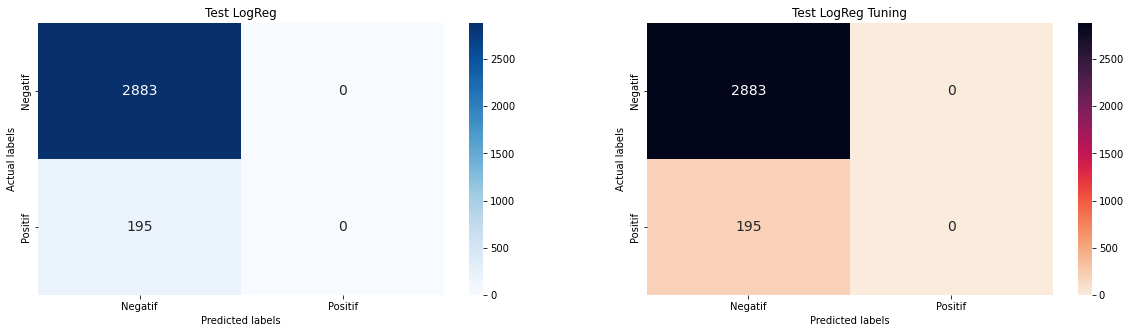

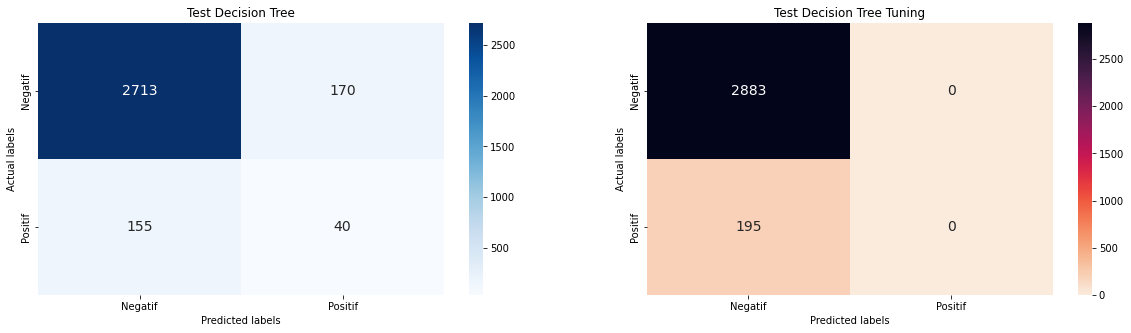

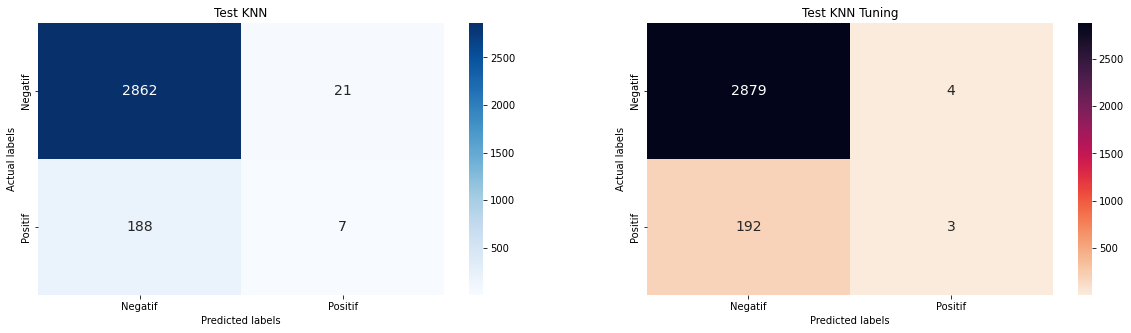

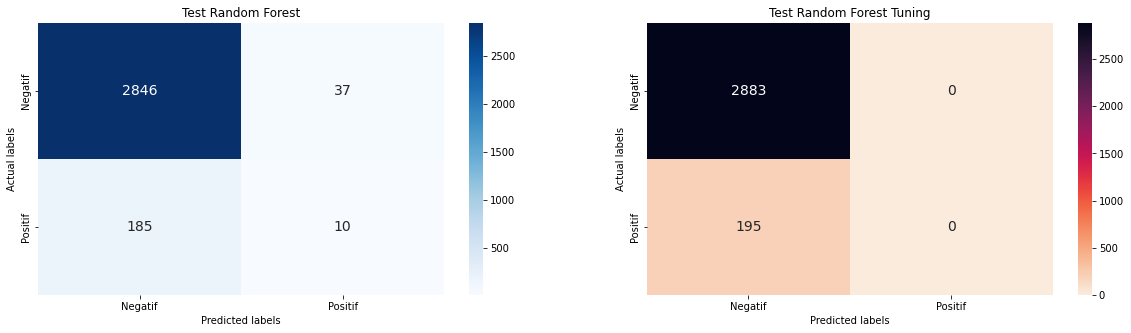

In [60]:
#plotting confusion matrix
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
logreg_matrix1= confusion_matrix(y_test, y_pred_test_logreg)
ax = sns.heatmap(logreg_matrix1, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Test LogReg")

plt.subplot(1,2,2)
logreg_matrix2= confusion_matrix(y_test, y_test_pred_grid_log_reg)
ax = sns.heatmap(logreg_matrix2, annot=True, cmap='rocket_r', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Test LogReg Tuning")


plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
tree_clf_matrix1= confusion_matrix(y_test, y_pred_test_tree_clf)
ax = sns.heatmap(tree_clf_matrix1, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Test Decision Tree")

plt.subplot(1,2,2)
tree_clf_matrix2= confusion_matrix(y_test, y_pred_test_tree_clf_grid)
ax = sns.heatmap(tree_clf_matrix2, annot=True, cmap='rocket_r', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Test Decision Tree Tuning")

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
neigh_matrix1= confusion_matrix(y_test, y_pred_test_neigh)
ax = sns.heatmap(neigh_matrix1, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Test KNN")

plt.subplot(1,2,2)
neigh_matrix2= confusion_matrix(y_test, y_pred_test_neigh_grid)
ax = sns.heatmap(neigh_matrix2, annot=True, cmap='rocket_r', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Test KNN Tuning")

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
for_clf_matrix1= confusion_matrix(y_test, y_pred_test_for_clf)
ax = sns.heatmap(for_clf_matrix1, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Test Random Forest")

plt.subplot(1,2,2)
for_clf_matrix2= confusion_matrix(y_test, y_pred_test_for_clf_grid)
ax = sns.heatmap(for_clf_matrix2, annot=True, cmap='rocket_r', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Test Random Forest Tuning")


- Dari 4 model yang di buat, bisa dibiling semua model memiliki hasil yang tidak begitu berbeda jauh. terutama dalam mengenali kasus fraud. Hali ini terjadi dikarenakan data yang di uji tergolong imbalance, sehingga model sulit untuk mengenali kasus fraud. 
- namun apabila kita ingin mendapatkan model yang mampu mengenali kasus fraud walau pun kecil, kita dapat menggunakan model Decision Tree, namun resikonya adalah model sedikit melakukan kesalahan dalam mengenali kasus yg bukan fraud, sehingga yg bukan fraud ini dinyatakan fraud menurut model. 

# **Pipeline**

In [61]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())


data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns),
])


# Final pipeline
pipe_tree_clf = make_pipeline(data_pipeline, tree_clf)

In [62]:
pipe_tree_clf.fit(X_train_trimmed, y_train_trimmed)

y_pred_train_pipe_tree_clf = pipe_tree_clf.predict(X_train_trimmed)
y_pred_test_pipe_tree_clf = pipe_tree_clf.predict(X_test)

print('---------------------TRAIN---------------------')
print(classification_report(y_train_trimmed, y_pred_train_pipe_tree_clf))
print(confusion_matrix(y_train_trimmed, y_pred_train_pipe_tree_clf))
print('---------------------TEST---------------------')
print(classification_report(y_test, y_pred_test_pipe_tree_clf))
print(confusion_matrix(y_test, y_pred_test_pipe_tree_clf))

---------------------TRAIN---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11073
           1       1.00      0.92      0.96       683

    accuracy                           1.00     11756
   macro avg       1.00      0.96      0.98     11756
weighted avg       1.00      1.00      1.00     11756

[[11073     0]
 [   53   630]]
---------------------TEST---------------------
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2883
           1       0.19      0.21      0.20       195

    accuracy                           0.89      3078
   macro avg       0.57      0.57      0.57      3078
weighted avg       0.90      0.89      0.90      3078

[[2713  170]
 [ 155   40]]


In [63]:
with open("full_pipe.pkl", "wb") as f:
    pickle.dump(pipe_tree_clf, f)

# **Model Inference**

In [64]:
df_inf.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     1
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [65]:
df_inf['Age'].skew()

0.9442326109777719

In [66]:
df_inf['Age'].fillna(df_inf['Age'].median(), inplace=True)

In [67]:
with open("full_pipe.pkl", "rb") as f:
    pipeline = pickle.load(f)

In [68]:
y_pred_inf = pipeline.predict(df_inf)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Peridict_FraudFound_P'])

In [69]:
# Concate to Original Dataframe
df_inf_result = pd.concat([df_inf, y_pred_inf], axis=1)

In [70]:
df_inf_result.loc[:,['AccidentArea', 'DriverRating', 'FraudFound_P', 'Peridict_FraudFound_P']]

,AccidentArea,DriverRating,FraudFound_P,Peridict_FraudFound_P
0,Urban,4,0,0
1,Urban,4,0,0
2,Urban,3,0,0
3,Urban,3,0,0
4,Urban,4,0,0
5,Urban,3,0,0
6,Urban,3,0,0
7,Urban,1,0,0
8,Urban,1,0,0
9,Urban,4,0,0
